# Cleaning Data

Veri temizleme işlemleri aşağıdaki adımları içermektedir:
* Boş hücrelerin temizlenmesi veya doldurulması
* Yanlış formattaki verilerin düzeltilmesi
* Yanlış verilerin düzeltilmesi
* Tekralı (çift) kayıtların temizlenmesi


In [1]:
import pandas as pd

df = pd.read_csv("data.csv") 

## Boş Hücreler

In [2]:
# Veri seti hakkında bilgi sahibi olalım

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [3]:
# Date ve Calories alanlarındaki kayıt sayıları bu alanlarda eksik olduğunu gösteriyor.
# Veri setindeki eksikleri görelim.

df.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

#### Boş hücresi olan kayıtları temizleme

In [4]:
# Boş kayıtları silerek oluşan güncel tablo ile yeni bir DataFrame oluşturalım. 
# Bu yöntemde eski DataFrame kayıtları etkilenmez.

new_df = df.dropna()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  29 non-null     int64  
 1   Date      29 non-null     object 
 2   Pulse     29 non-null     int64  
 3   Maxpulse  29 non-null     int64  
 4   Calories  29 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


Orjinal tabloda 32 kayıt olmasına rağmen yeni tabloda boş hücreler silinince 29 kayıt kaldı.<br>
<br>
**! İpucu:** <font color="red">inplace=True</font> parametresi ile yapılan değişiklik orjinal DataFrame üzerinde güncellenir.<br>
Yeni bir DataFrame oluşturmadan boş hücresi olan kayıtları temizlemek için **df.dropna(inplace=True)** kodu kullanılabilir.

#### Boş hücreleri sabit bir değer ile doldurma

In [5]:
# Calories alanındaki boş hücreleri 130 değeri ile dolduralım.

df.fillna({"Calories":130}, inplace=True)

In [6]:
# Embarked alanında boş veri sayısını bulalım.

df["Calories"].isnull().sum()

0

#### Boş hücreleri istatistik değerleri (mean, median, mod) ile doldurma

In [7]:
df = pd.read_csv("data.csv") 

# Calories alanındaki boş kayıt sayısı

df["Calories"].isnull().sum()

2

In [8]:
# Calories alanının istatistik değerleri

print("Ortalama değer:", df["Calories"].mean())
print("Ortanca değer:", df["Calories"].median())
print("En çok tekrar eden değer:", df["Calories"].mode()[0])

Ortalama değer: 304.68
Ortanca değer: 291.2
En çok tekrar eden değer: 300.0


In [9]:
# Calories alanındaki boş hücreleri Ortanca değer ile dolduralım
df.fillna({"Calories": df["Calories"].median()}, inplace=True)

# Doldurma sonucu boş hücre sayısı
df["Calories"].isnull().sum()

0

#### Tüm alanların boş hücrelerini aynı yöntemle doldurma

In [10]:
df = pd.read_csv("data.csv") 

#Tüm boşlukları her bir alanın en çok tekrar eden değerini alarak otomatik doldur

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
x = imputer.fit_transform(df)

pd.DataFrame(x).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32 non-null     object
 1   1       32 non-null     object
 2   2       32 non-null     object
 3   3       32 non-null     object
 4   4       32 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB


**SimpleImputer** kütüphanesinde aşağıdaki **strategy** parametreleri kullanılabilir:
* median
* mean
* constant
* most_frequent

## Hatalı Verilerin Düzeltilmesi

In [11]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


Veri setine bakınca Duration alanında en küçük (min) değer 30, ortalama (mean) ise 68.4 olmasına rağmen en büyük değer (max) 450 olduğu görülüyor. Bu veri setinde hatalı veri olduğunu gösterir.

<Axes: ylabel='Frequency'>

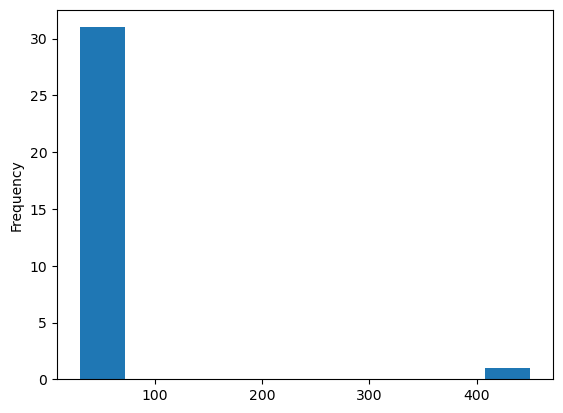

In [12]:
df['Duration'].plot.hist()

Yukarıdaki dağılım grafiğine bakınca 31 adet verinin 0-100 arasında, 1 tanesinin de 400'den büyük olduğu görülüyor. Bu değerin yanlışlıkla 10 katı girildiği söylenebilir.

In [13]:
# Hatalı veriyi tespit edelim.

df[df["Duration"]>100]

,Duration,Date,Pulse,Maxpulse,Calories
7,450,'2020/12/08',104,134,253.3


In [14]:
# Bu veriyi 45 ile değiştirelim

df.loc[7, 'Duration'] = 45

In [15]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,55.781250,103.500000,128.500000,304.680000
std,7.840072,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,56.250000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,60.000000,130.000000,175.000000,479.000000


## Hatalı Veri Tipinin Düzeltilmesi

In [16]:
df = pd.read_csv("data.csv")
df.tail(10)

,Duration,Date,Pulse,Maxpulse,Calories
22,45,NaN,100,119,282.0
23,60,'2020/12/23',130,101,300.0
24,45,'2020/12/24',105,132,246.0
25,60,'2020/12/25',102,126,334.5
26,60,20201226,100,120,250.0
27,60,'2020/12/27',92,118,241.0
28,60,'2020/12/28',103,132,NaN
29,60,'2020/12/29',100,132,280.0
30,60,'2020/12/30',102,129,380.3
31,60,'2020/12/31',92,115,243.0


Veri setinin 26. satırında yanlış girilen bir tarih değeri var. Bunu gidermek için bu alanı tarih formatına çevirebiliriz.

In [17]:
# Date alanını tarih formatına dönüştürme

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

**errors='coerce'**: Eğer bir tarih dönüştürme işlemi başarısız olursa (örneğin, geçersiz bir tarih formatı varsa), o değeri NaT (Not a Time) olarak ayarlar. Yani, bu durumda hatalı tarih verileri kaybolmaz, ancak geçersiz olanlar NaT ile değiştirilir.

In [18]:
df.tail(10)

,Duration,Date,Pulse,Maxpulse,Calories
22,45,NaT,100,119,282.0
23,60,2020-12-23,130,101,300.0
24,45,2020-12-24,105,132,246.0
25,60,2020-12-25,102,126,334.5
26,60,NaT,100,120,250.0
27,60,2020-12-27,92,118,241.0
28,60,2020-12-28,103,132,NaN
29,60,2020-12-29,100,132,280.0
30,60,2020-12-30,102,129,380.3
31,60,2020-12-31,92,115,243.0


## Tekralı Kayıtların Temizlenmesi

In [19]:
df = pd.read_csv("data.csv")


# Belirli alanlara göre tekrarlı kayıtları bulmak için subset kullanılabilir.

df[df.duplicated(subset=["Pulse", "Maxpulse"])==True]

,Duration,Date,Pulse,Maxpulse,Calories
12,60,'2020/12/12',100,120,250.7
17,60,'2020/12/17',100,120,300.0
26,60,20201226,100,120,250.0


Yukarıdaki örnekte Pulse ve Maxpulse alanları aynı olan kayıtlar var. Ancak biz tüm alanları aynı olan satırı arıyoruz.

In [20]:
# Tekrarlı kayıtları listeleyelim

df[df.duplicated()==True]

,Duration,Date,Pulse,Maxpulse,Calories
12,60,'2020/12/12',100,120,250.7


Veri setindek 12. satır bir başka kayıtla bire bir aynı olduğu için bu satırın temizlenmesi gerekiyor.

In [21]:
## Veri setindeki tüm tekrarlı kayıtları temizle

df.drop_duplicates(inplace = True)

In [22]:
# Tekrarlı kayıtlar
df[df.duplicated()==True]

,Duration,Date,Pulse,Maxpulse,Calories


# Son Söz

Bu projede veri setini temizleme yöntemlerini kullandık. Bu yöntemler şunlardır:

* Boş hücresi olan kayıtları ya tamamen sildik ya da bunları sabit bir değerle veya istatistik değerleri ile doldurduk.
* Hatalı veriyi ve veri tipini düzelttik.
* Çift kayıtları temizleyerek tek kayıt haline getirdir. 

Yukarıdaki işlemleri yapabilmek için veri setini tanımak çok önemli bu aşamada aşağıdaki dosyalara göz atılması tavsiye edilir:

- Verileri grafiklerle tanıma için [Veri Görselleştirme](Data-Visualization/Data-Visualization.ipynb)
- Veri setinin yapısı ve özelliklerini görmek için [Keşfedici Veri Analizi (EDA)](Exploratory-Data-Analysis/Exploratory-Data-Analysis.ipynb)